In [1]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [3]:
# Aggregate weekly sales
df = pd.read_csv("./../datasets/clean_walmart.csv", parse_dates=["Date"])
sales = df.groupby("Date")["Weekly_Sales"].sum().reset_index()

# Prophet expects: ds (date), y (value)
sales = sales.rename(columns={"Date": "ds", "Weekly_Sales": "y"})
print(sales.head())

          ds            y
0 2010-02-05  49750740.50
1 2010-02-12  48336677.63
2 2010-02-19  48276993.78
3 2010-02-26  43968571.13
4 2010-03-05  46871470.30


In [4]:
# Initialize Prophet model
model = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False)

# Add US holidays (Walmart sales are highly holiday-driven)
model.add_country_holidays(country_name='US')

# Fit model
model.fit(sales)

00:39:33 - cmdstanpy - INFO - Chain [1] start processing
00:39:33 - cmdstanpy - INFO - Chain [1] done processing


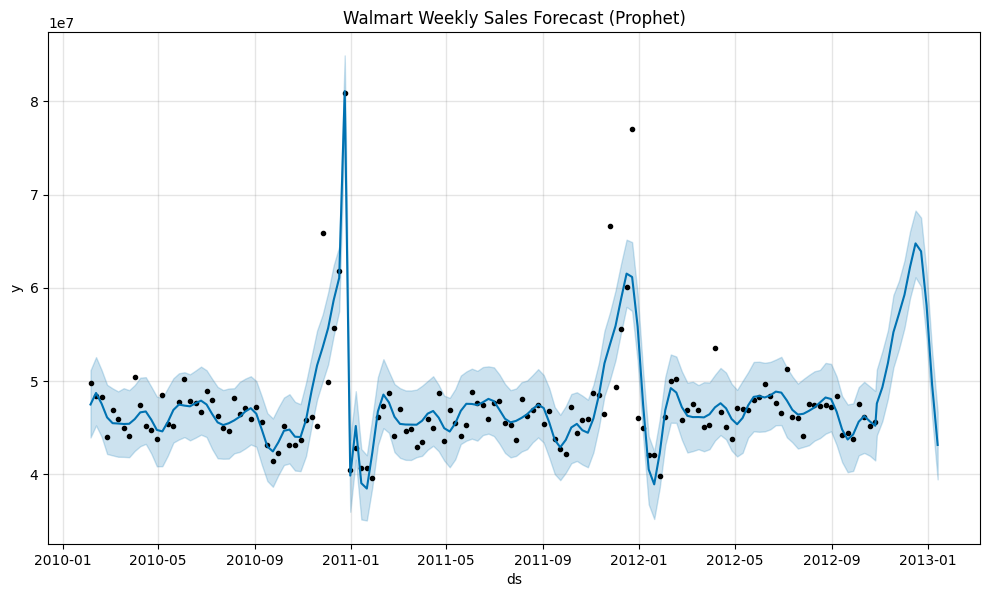

In [5]:
# Forecast 12 weeks ahead
future = model.make_future_dataframe(periods=12, freq="W")
forecast = model.predict(future)

# Plot
fig = model.plot(forecast)
plt.title("Walmart Weekly Sales Forecast (Prophet)")
plt.show()

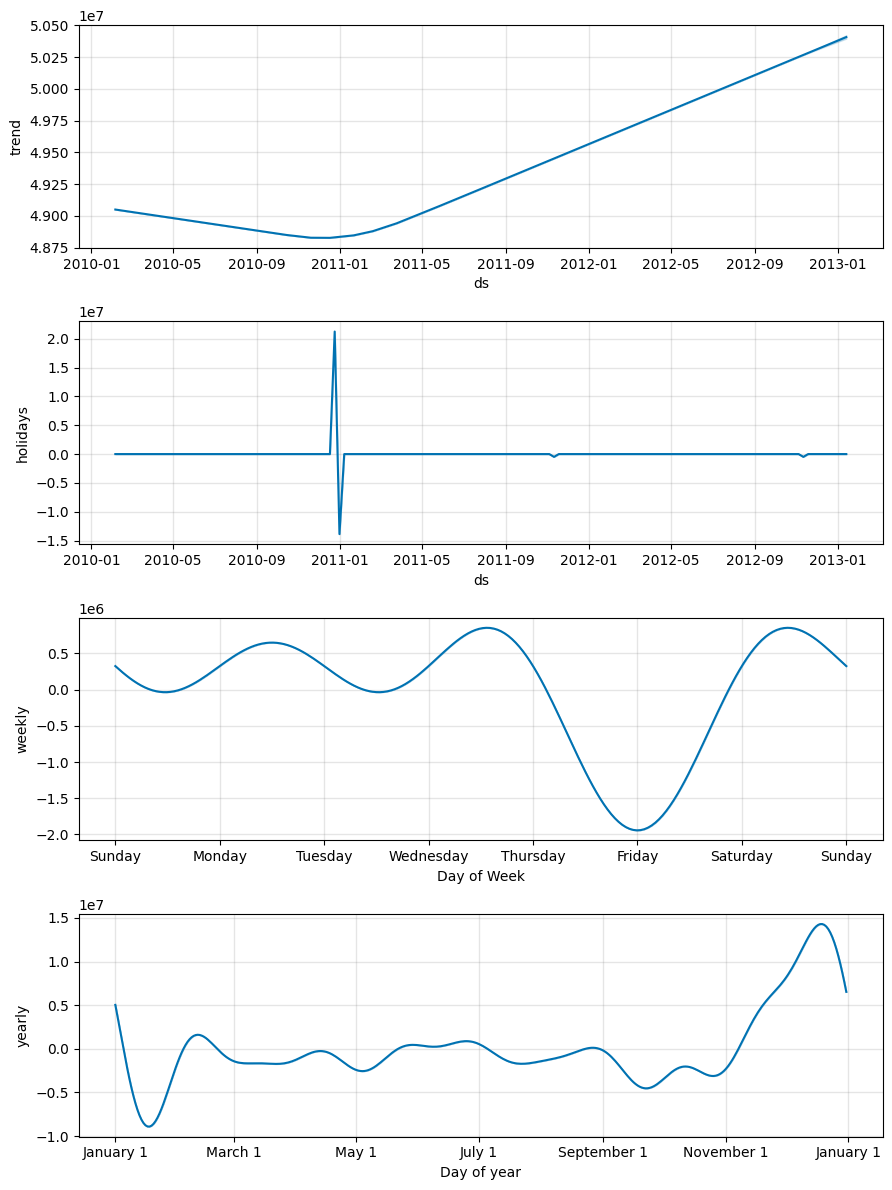

In [7]:
fig2 = model.plot_components(forecast)
plt.show()

In [9]:
df_results = sales.merge(forecast[["ds", "yhat"]], on="ds", how="left")
df_results.rename(columns={"ds": "Date", "y": "Weekly_Sales", "yhat": "Forecast_Prophet"}, inplace=True)

df_results = sales.merge(forecast[["ds", "yhat"]], on="ds", how="left")
df_results.rename(columns={"ds": "Date", "y": "Weekly_Sales", "yhat": "Forecast_Prophet"}, inplace=True)

df_results.to_csv("./../datasets/prophet_forecasts.csv", index=False)
print("✅ Prophet forecasts saved as prophet_forecasts.csv")

✅ Prophet forecasts saved as prophet_forecasts.csv


In [12]:
import streamlit as st
import plotly.express as px
import pandas as pd

# Load Walmart sales data (example)
df = pd.read_csv("./../datasets/xgboost_forecasts.csv")

st.title("📊 Walmart Sales Forecasting Dashboard")

# Sidebar filters
store = st.selectbox("Select Store:", df["Store"].unique())
dept = st.selectbox("Select Department:", df["Dept"].unique())

# Filter data
filtered = df[(df["Store"] == store) & (df["Dept"] == dept)]

# Plotly line chart
fig = px.line(filtered, x="Date", y=["Actual_Sales", "Forecast_Sales"], 
              labels={"value": "Weekly Sales"}, 
              title=f"Store {store} - Dept {dept} Forecast")

st.plotly_chart(fig)

2025-09-10 01:08:38.460 
  command:

    streamlit run C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-10 01:08:38.465 Session state does not function when running a script without `streamlit run`


ValueError: All arguments should have the same length. The length of argument `y` is 2, whereas the length of previously-processed arguments ['Date'] is 139